# OCR Cookbook

---

## OCR Exploration and Structured Outputs
In this cookbook, we will explore the basics of OCR and leverage it together with existing models to achieve structured outputs fueled by our OCR model.

You may want to do this in case current vision models are not powerful enough, hence enhancing their vision OCR capabilities with the OCR model to achieve better structured data extraction.

---

### Used
- Mistral OCR
- Pixtral 12B & Ministral 8B


### Setup
First, let's install `mistralai` and download the required files.

In [1]:
!pip install mistralai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.3/278.3 kB 6.1 MB/s eta 0:00:00


In [2]:
!wget https://raw.githubusercontent.com/mistralai/cookbook/refs/heads/main/mistral/ocr/mistral7b.pdf
!wget https://raw.githubusercontent.com/mistralai/cookbook/refs/heads/main/mistral/ocr/receipt.png

--2025-03-12 05:30:12--  https://raw.githubusercontent.com/mistralai/cookbook/refs/heads/main/mistral/ocr/mistral7b.pdf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3749788 (3.6M) [application/octet-stream]
Saving to: ‘mistral7b.pdf’

mistral7b.pdf       100%[===================>]   3.58M  --.-KB/s    in 0.09s   

2025-03-12 05:30:12 (42.0 MB/s) - ‘mistral7b.pdf’ saved [3749788/3749788]

--2025-03-12 05:30:12--  https://raw.githubusercontent.com/mistralai/cookbook/refs/heads/main/mistral/ocr/receipt.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting res

We can now set up our client. You can create an API key on our [Plateforme](https://console.mistral.ai/api-keys/).

In [3]:
from mistralai import Mistral

api_key = "kjEavcsnT1h4rD0BGZ4918D8uLxaK3dS"
client = Mistral(api_key=api_key)

There are two types of files you can apply OCR to:
- PDF files, either uploaded or from URLs...

In [15]:
from pathlib import Path

# pdf_file = Path("mistral7b.pdf")

from google.colab import files
import io

uploaded = files.upload()

# Get the first uploaded file
filename, content = next(iter(uploaded.items()))

# Create an in-memory file-like object
pdf_file = Path(filename)

assert pdf_file.is_file()

Saving iesc101.pdf to iesc101 (2).pdf


{
    "pages": [
        {
            "index": 0,
            "markdown": "# Chapter 1 \n\n## Matter in Our Surroundings\n\nAs we look at our surroundings, we see a large variety of things with different shapes, sizes and textures. Everything in this universe is made up of material which scientists have named \"matter\". The air we breathe, the food we eat, stones, clouds, stars, plants and animals, even a small drop of water or a particle of sand - every thing is matter. We can also see as we look around that all the things mentioned above occupy space and have mass. In other words, they have both mass* and volume**.\n\nSince early times, human beings have been trying to understand their surroundings. Early Indian philosophers classified matter in the form of five basic elements - the \"Panch Tatva\" - air, earth, fire, sky and water. According to them everything, living or nonliving, was made up of these five basic elements. Ancient Greek philosophers had arrived at a similar classi
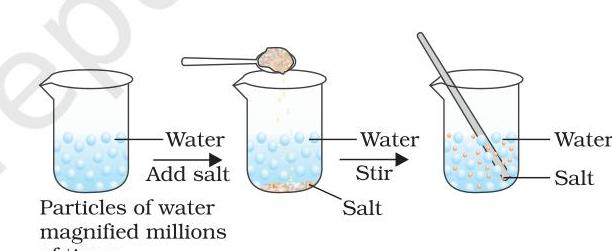
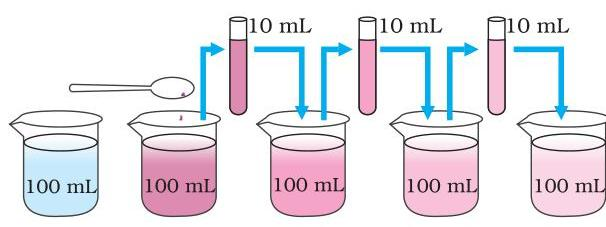
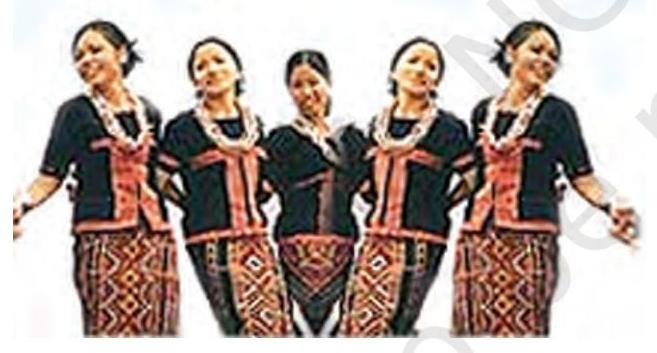
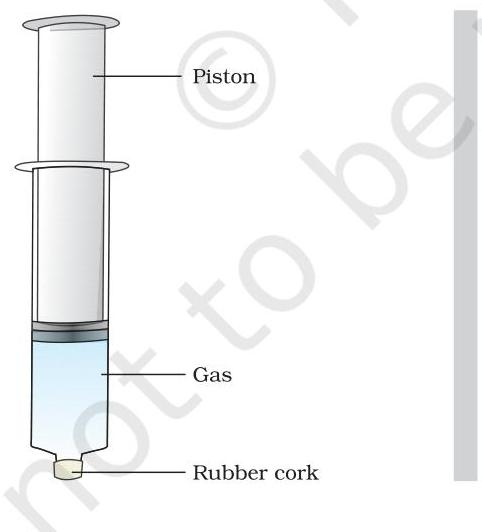
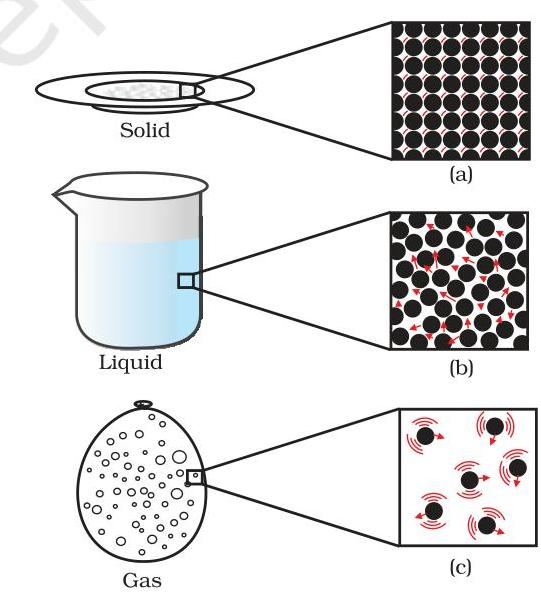
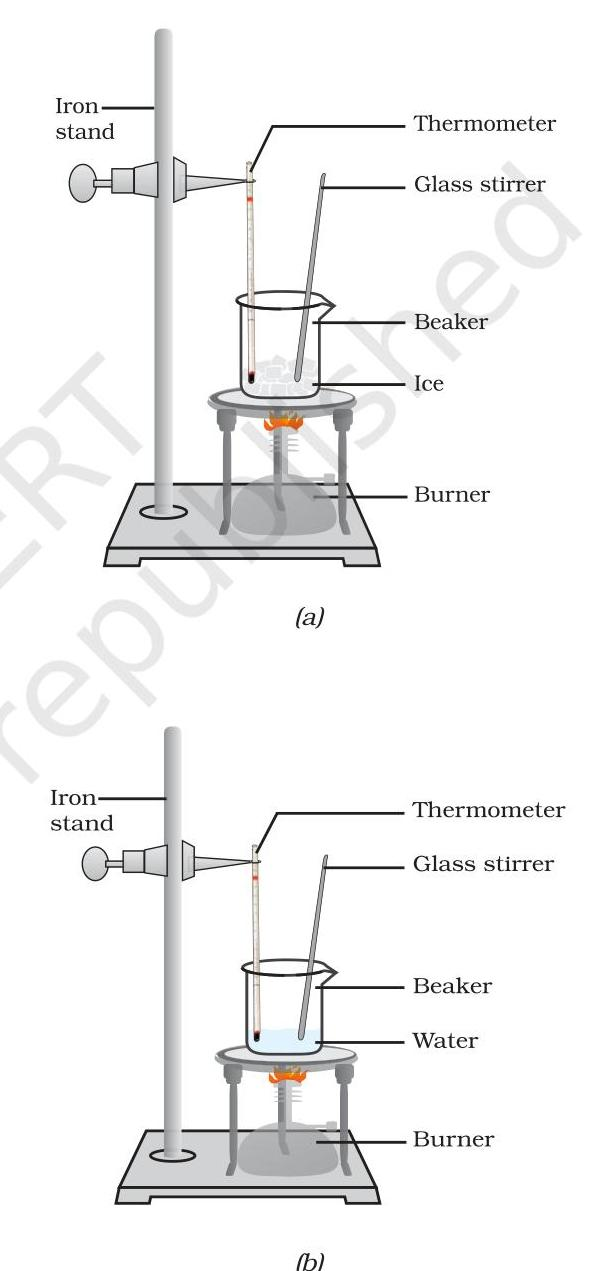
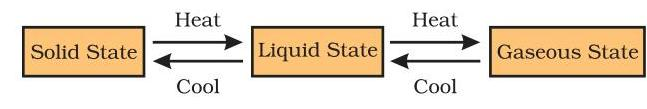
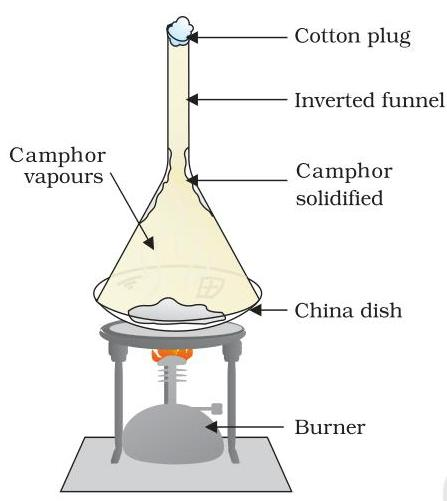
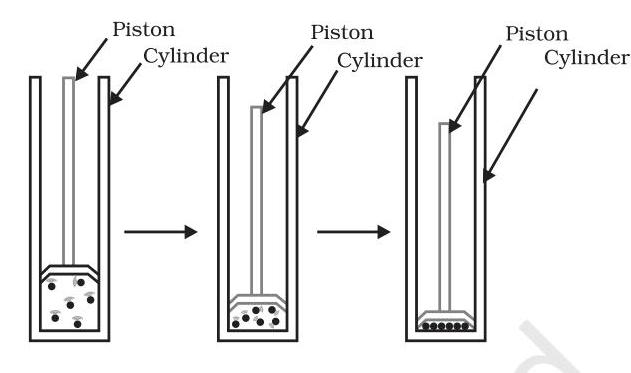
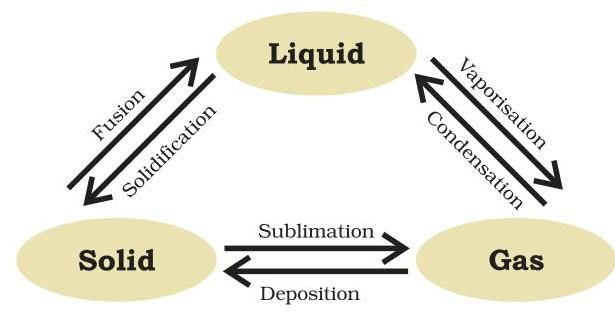
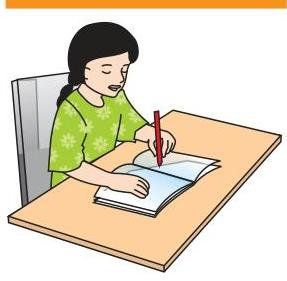
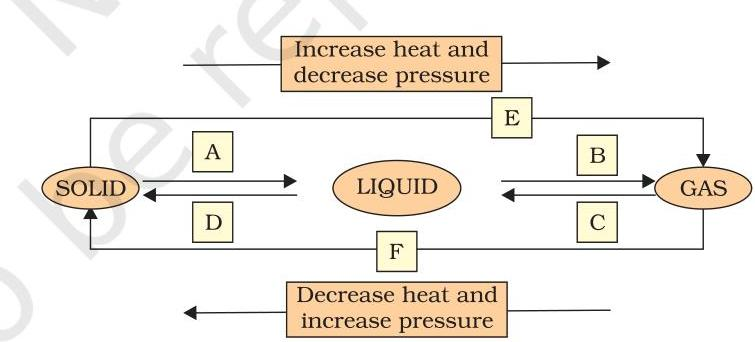
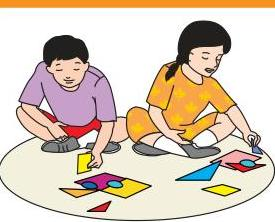
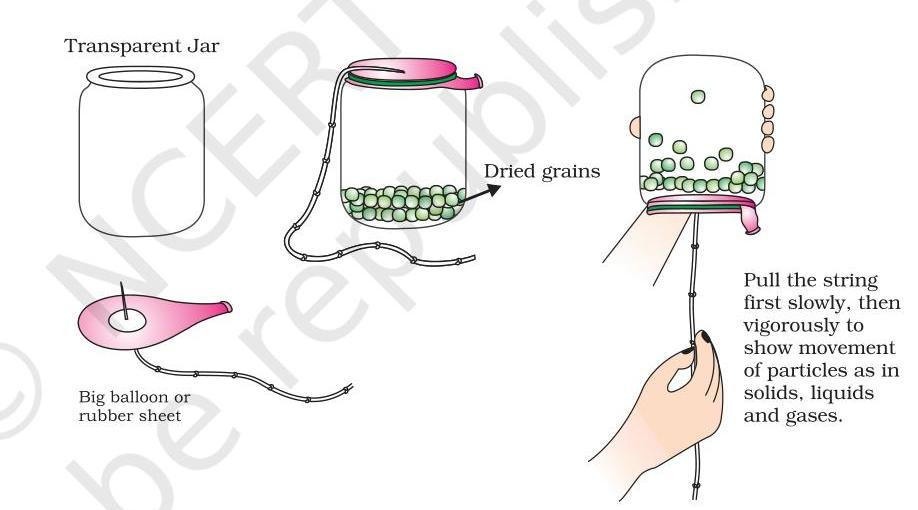

<ipython-input-19-793982fc17e2>:16: PydanticDeprecatedSince20: The `json` method is deprecated; use `model_dump_json` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  response_dict = json.loads(pdf_response.json())


In [19]:
from mistralai import DocumentURLChunk, ImageURLChunk, TextChunk
import json

uploaded_file = client.files.upload(
    file={
        "file_name": pdf_file.stem,
        "content": pdf_file.read_bytes(),
    },
    purpose="ocr",
)

signed_url = client.files.get_signed_url(file_id=uploaded_file.id, expiry=1)

pdf_response = client.ocr.process(document=DocumentURLChunk(document_url=signed_url.url), model="mistral-ocr-latest", include_image_base64=True)

response_dict = json.loads(pdf_response.json())
json_string = json.dumps(response_dict, indent=4)
print(json_string)

*The OCR model can output interleaved text and images (set `include_image_base64=True` to return the base64 image ), we can view the result with the following:*

# Chapter 1 

## Matter in Our Surroundings

As we look at our surroundings, we see a large variety of things with different shapes, sizes and textures. Everything in this universe is made up of material which scientists have named "matter". The air we breathe, the food we eat, stones, clouds, stars, plants and animals, even a small drop of water or a particle of sand - every thing is matter. We can also see as we look around that all the things mentioned above occupy space and have mass. In other words, they have both mass* and volume**.

Since early times, human beings have been trying to understand their surroundings. Early Indian philosophers classified matter in the form of five basic elements - the "Panch Tatva" - air, earth, fire, sky and water. According to them everything, living or nonliving, was made up of these five basic elements. Ancient Greek philosophers had arrived at a similar classification of matter.

Modern day scientists have evolved two types of classification of matter based on their physical properties and chemical nature.

In this chapter we shall learn about matter based on its physical properties. Chemical aspects of matter will be taken up in subsequent chapters.

### 1.1 Physical Nature of Matter

### 1.1.1 Matter is made up of particles

For a long time, two schools of thought prevailed regarding the nature of matter. One school believed matter to be continuous like a block of wood, whereas, the other thought that matter was made up of particles like sand. Let us perform an activity to decide about the nature of matter - is it continuous or particulate?

## Activity <br> 1.1

- Take a 100 mL beaker.
- Fill half the beaker with water and mark the level of water.
- Dissolve some salt/sugar with the help of a glass rod.
- Observe any change in water level.
- What do you think has happened to the salt?
- Where does it disappear?
- Does the level of water change?

In order to answer these questions we need to use the idea that matter is made up of particles. What was there in the spoon, salt or sugar, has now spread throughout water. This is illustrated in Fig. 1.1.
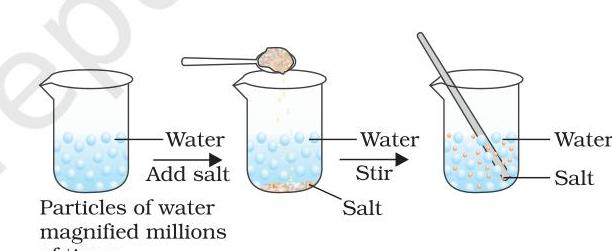

Fig. 1.1: When we dissolve salt in water, the particles of salt get into the spaces between particles of water.

### 1.1.2 How small are these particles OF MATTER?

## Activity <br> 1.2

- Take 2-3 crystals of potassium permanganate and dissolve them in 100 mL of water.

[^0]
[^0]:    * The SI unit of mass is kilogram (kg).
    ** The SI unit of volume is cubic metre $\left(\mathrm{m}^{3}\right)$. The common unit of measuring volume is litre (L) such that $1 \mathrm{~L}=1 \mathrm{dm}^{3}, 1 \mathrm{~L}=1000 \mathrm{~mL}, 1 \mathrm{~mL}=1 \mathrm{~cm}^{3}$.

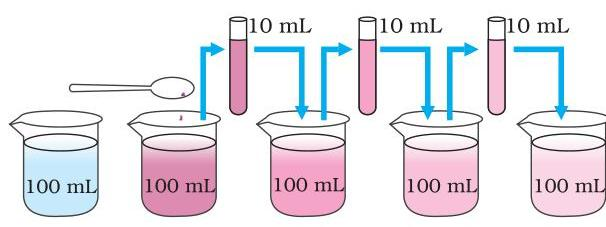

Fig. 1.2: Estimating how small are the particles of matter. With every dilution, though the colour becomes light, it is still visible.

This experiment shows that just a few crystals of potassium permanganate can colour a large volume of water (about 1000 L ). So we conclude that there must be millions of tiny particles in just one crystal of potassium permanganate, which keep on dividing themselves into smaller and smaller particles.

The same activity can be done using 2 ml of Dettol instead of potassium permanganate. The smell can be detected even on repeated dilution.

The particles of matter are very small they are small beyond our imagination!!!!

### 1.2 Characteristics of Particles of Matter

### 1.2.1 Particles of Matter have Space BETWEEN THEM

In activities 1.1 and 1.2 we saw that particles of sugar, salt, Dettol, or potassium permanganate got evenly distributed in water. Similarly, when we make tea, coffee or lemonade (nimbu paani), particles of one type of matter get into the spaces between particles of the other. This shows that there is enough space between particles of matter.

### 1.2.2 PARTICLES OF MATTER ARE CONTINUOUSLY MOVING

## Activity <br> 1.3

Put an unlit incense stick in a corner of your class. How close do you have to go near it so as to get its smell?
Now light the incense stick. What happens? Do you get the smell sitting at a distance?
Record your observations.

## Activity

Take two glasses/beakers filled with water.
Put a drop of blue or red ink slowly and carefully along the sides of the first beaker and honey in the same way in the second beaker.
Leave them undisturbed in your house or in a corner of the class.
Record your observations.
What do you observe immediately after adding the ink drop?
What do you observe immediately after adding a drop of honey?
How many hours or days does it take for the colour of ink to spread evenly throughout the water?

## Activity

Drop a crystal of copper sulphate or potassium permanganate into a glass of hot water and another containing cold water. Do not stir the solution. Allow the crystals to settle at the bottom.
What do you observe just above the solid crystal in the glass?
What happens as time passes?
What does this suggest about the particles of solid and liquid?
Does the rate of mixing change with temperature? Why and how?
From the above three activities (1.3, 1.4 and 1.5), we can conclude the following:

Particles of matter are continuously moving, that is, they possess what we call the kinetic energy. As the temperature rises, particles move faster. So, we can say that with increase in temperature the kinetic energy of the particles also increases.

In the above three activities we observe that particles of matter intermix on their own with each other. They do so by getting into the spaces between the particles. This intermixing of particles of two different types of matter on their own is called diffusion. We also observe that on heating, diffusion becomes faster. Why does this happen?

### 1.2.3 Particles of matter attract EACH OTHER

## Activity <br> 1.6

- Play this game in the field- make four groups and form human chains as suggested:
- The first group should hold each other from the back and lock arms like Idu-Mishmi dancers (Fig. 1.3).
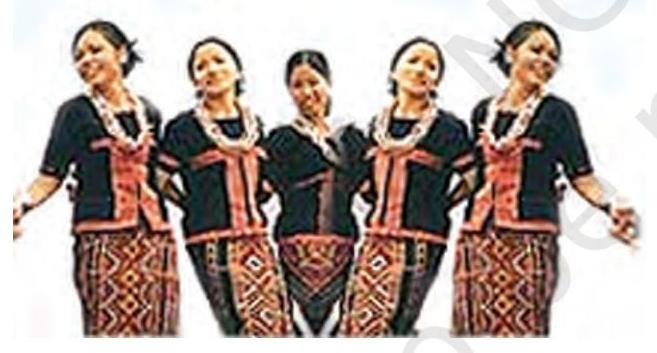

Fig. 1.3

- The second group should hold hands to form a human chain.
- The third group should form a chain by touching each other with only their finger tips.
- Now, the fourth group of students should run around and try to break the three human chains one by one into as many small groups as possible.
- Which group was the easiest to break? Why?

If we consider each student as a particle of matter, then in which group the particles held each other with the maximum force?

## Activity <br> 1.7

- Take an iron nail, a piece of chalk and a rubber band.
- Try breaking them by hammering, cutting or stretching.
- In which of the above three substances do you think the particles are held together with greater force?


## Activity <br> 1.8

- Take some water in a container, try cutting the surface of water with your fingers.
- Were you able to cut the surface of water?
- What could be the reason behind the surface of water remaining together?

The above three activities (1.6, 1.7 and 1.8) suggest that particles of matter have force acting between them. This force keeps the particles together. The strength of this force of attraction varies from one kind of matter to another.

## 1. What are the characteristics of the particles of matter?

### 1.3 States of Matter

Observe different types of matter around you. What are its different states? We can see that matter around us exists in three different states- solid, liquid and gas. These states of matter arise due to the variation in the characteristics of the particles of matter.

Now, let us study about the properties of these three states of matter in detail.

### 1.3.1 The SOlID STATE

## Activity <br> 1.9

Collect the following articles - a pen, a book, a needle and a piece of wooden stick.
Sketch the shape of the above articles in your notebook by moving a pencil around them.
Do all these have a definite shape, distinct boundaries and a fixed volume?
What happens if they are hammered, pulled or dropped?
Are these capable of diffusing into each other?
Try compressing them by applying force. Are you able to compress them?
All the above are examples of solids. We can observe that all these have a definite shape, distinct boundaries and fixed volumes, that is, have negligible compressibility. Solids have a tendency to maintain their shape when subjected to outside force. Solids may break under force but it is difficult to change their shape, so they are rigid.
Consider the following:
(a) What about a rubber band, can it change its shape on stretching? Is it a solid?
(b) What about sugar and salt? When kept in different jars these take the shape of the jar. Are they solid?
(c) What about a sponge? It is a solid yet we are able to compress it. Why?
All the above are solids as:

- A rubber band changes shape under force and regains the same shape when
the force is removed. If excessive force is applied, it breaks.
- The shape of each individual sugar or salt crystal remains fixed, whether we take it in our hand, put it in a plate or in a jar.
- A sponge has minute holes, in which air is trapped, when we press it, the air is expelled out and we are able to compress it.


### 1.3.2 The liquid state

## Activity

Collect the following:
(a) water, cooking oil, milk, juice, a cold drink.
(b) containers of different shapes. Put a 50 mL mark on these containers using a measuring cylinder from the laboratory.
What will happen if these liquids are spilt on the floor?
Measure 50 mL of any one liquid and transfer it into different containers one by one. Does the volume remain the same?
Does the shape of the liquid remain the same?
When you pour the liquid from one container into another, does it flow easily?
We observe that liquids have no fixed shape but have a fixed volume. They take up the shape of the container in which they are kept. Liquids flow and change shape, so they are not rigid but can be called fluid.

Refer to activities 1.4 and 1.5 where we saw that solids and liquids can diffuse into liquids. The gases from the atmosphere diffuse and dissolve in water. These gases, especially oxygen and carbon dioxide, are essential for the survival of aquatic animals and plants.

All living creatures need to breathe for survival. The aquatic animals can breathe under water due to the presence of dissolved oxygen in water. Thus, we may conclude that solids, liquids and gases can diffuse into liquids. The rate of diffusion of liquids is

higher than that of solids. This is due to the fact that in the liquid state, particles move freely and have greater space between each other as compared to particles in the solid state.

### 1.3.3 The GASEOUS STATE

Have you ever observed a balloon seller filling a large number of balloons from a single cylinder of gas? Enquire from him how many balloons is he able to fill from one cylinder. Ask him which gas does he have in the cylinder.

## Activity

Take three 100 mL syringes and close their nozzles by rubber corks, as shown in Fig.1.4.

- Remove the pistons from all the syringes.
- Leaving one syringe untouched, fill water in the second and pieces of chalk in the third.
- Insert the pistons back into the syringes. You may apply some vaseline on the pistons before inserting them into the syringes for their smooth movement.
- Now, try to compress the content by pushing the piston in each syringe.
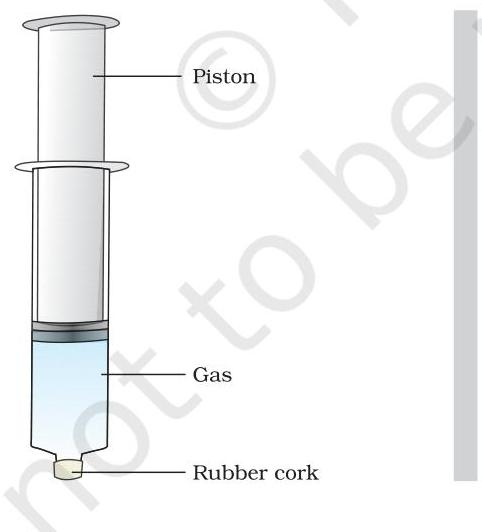

Fig. 1.4

What do you observe? In which case was the piston easily pushed in?

- What do you infer from your observations?

We have observed that gases are highly compressible as compared to solids and liquids. The liquefied petroleum gas (LPG) cylinder that we get in our home for cooking or the oxygen supplied to hospitals in cylinders is compressed gas. Compressed natural gas (CNG) is used as fuel these days in vehicles. Due to its high compressibility, large volumes of a gas can be compressed into a small cylinder and transported easily.

We come to know of what is being cooked in the kitchen without even entering there, by the smell that reaches our nostrils. How does this smell reach us? The particles of the aroma of food mix with the particles of air spread from the kitchen, reach us and even farther away. The smell of hot cooked food reaches us in seconds; compare this with the rate of diffusion of solids and liquids. Due to high speed of particles and large space between them, gases show the property of diffusing very fast into other gases.

In the gaseous state, the particles move about randomly at high speed. Due to this random movement, the particles hit each other and also the walls of the container. The pressure exerted by the gas is because of this force exerted by gas particles per unit area on the walls of the container.
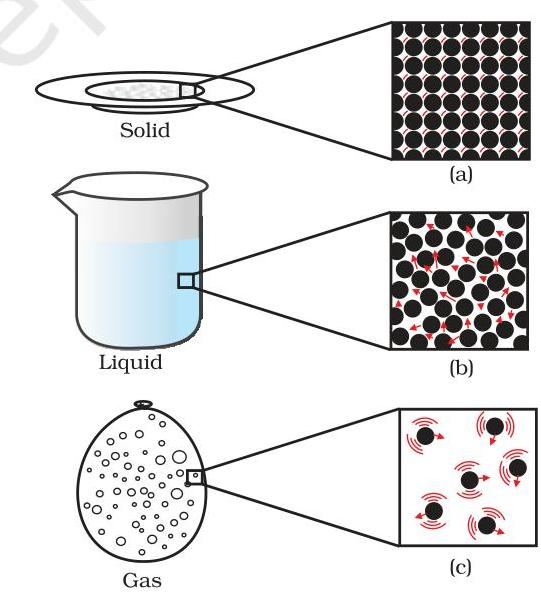

Fig. 1.5: $a, b$ and $c$ show the magnified schematic pictures of the three states of matter. The motion of the particles can be seen and compared in the three states of matter.

## Questions

1. The mass per unit volume of a substance is called density. (density $=$ mass/volume). Arrange the following in order of increasing density - air, exhaust from chimneys, honey, water, chalk, cotton and iron.
2. (a) Tabulate the differences in the characterisitcs of states of matter.
(b) Comment upon the following: rigidity, compressibility, fluidity, filling a gas container, shape, kinetic energy and density.
3. Give reasons
(a) A gas fills completely the vessel in which it is kept.
(b) A gas exerts pressure on the walls of the container.
(c) A wooden table should be called a solid.
(d) We can easily move our hand in air but to do the same through a solid block of wood we need a karate expert.
4. Liquids generally have lower density as compared to solids. But you must have observed that ice floats on water. Find out why.

### 1.4 Can Matter Change its State?

We all know from our observation that water can exist in three states of matter-

- solid, as ice,
- liquid, as the familiar water, and
- gas, as water vapour.

What happens inside the matter during this change of state? What happens to the particles of matter during the change of states? How does this change of state take place? We need answers to these questions, isn't it?

### 1.4.1 EFFECT OF CHANGE OF TEMPERATURE

## Activity <br> 1.12

Take about 150 g of ice in a beaker and suspend a laboratory thermometer so that its bulb is in contact with the ice, as in Fig. 1.6.
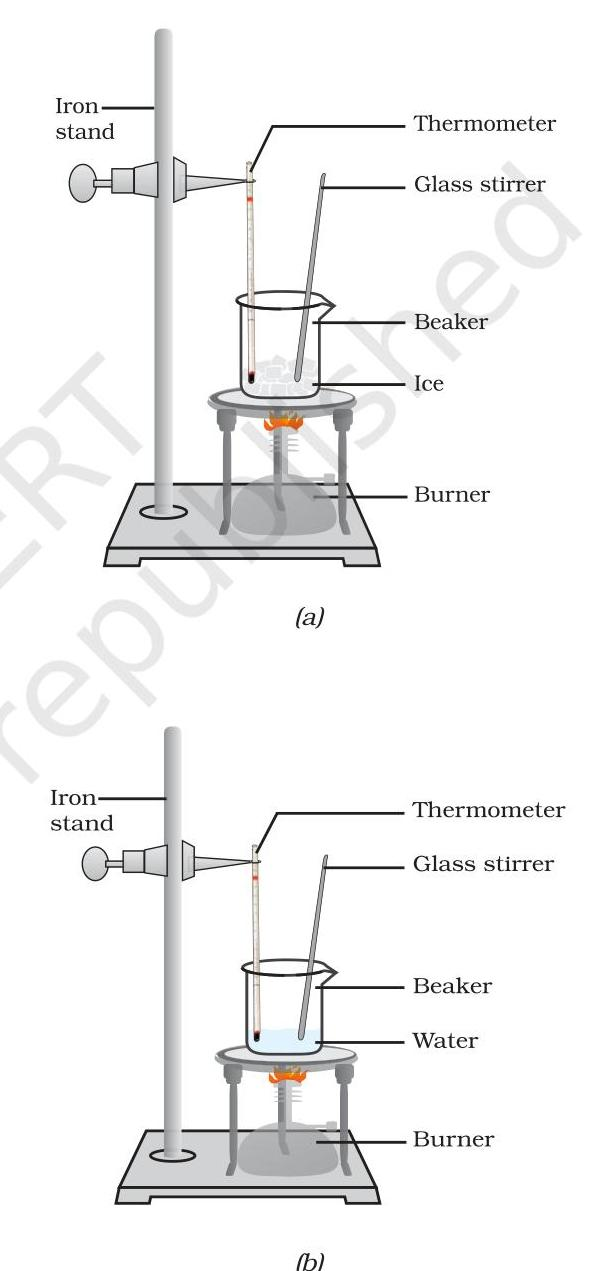

Fig. 1.6: (a) Conversion of ice to water, (b) conversion of water to water vapour

- Start heating the beaker on a low flame.
- Note the temperature when the ice starts melting.
- Note the temperature when all the ice has converted into water.
- Record your observations for this conversion of solid to liquid state.
- Now, put a glass rod in the beaker and heat while stirring till the water starts boiling.
- Keep a careful eye on the thermometer reading till most of the water has vaporised.
- Record your observations for the conversion of water in the liquid state to the gaseous state.

On increasing the temperature of solids, the kinetic energy of the particles increases. Due to the increase in kinetic energy, the particles start vibrating with greater speed. The energy supplied by heat overcomes the forces of attraction between the particles. The particles leave their fixed positions and start moving more freely. A stage is reached when the solid melts and is converted to a liquid. The minimum temperature at which a solid melts to become a liquid at the atmospheric pressure is called its melting point.

The melting point of a solid is an indication of the strength of the force of attraction between its particles.

The melting point of ice is $273.15 \mathrm{~K}^{\circ}$. The process of melting, that is, change of solid state into liquid state is also known as fusion. When a solid melts, its temperature remains the same, so where does the heat energy go?

You must have observed, during the experiment of melting, that the temperature of the system does not change after the melting point is reached, till all the ice melts. This happens even though we continue to heat the beaker, that is, we continue to supply heat. This heat gets used up in changing the
state by overcoming the forces of attraction between the particles. As this heat energy is absorbed by ice without showing any rise in temperature, it is considered that it gets hidden into the contents of the beaker and is known as the latent heat. The word latent means hidden. The amount of heat energy that is required to change 1 kg of a solid into liquid at atmospheric pressure at its melting point is known as the latent heat of fusion. So, particles in water at $0^{\circ} \mathrm{C}(273 \mathrm{~K})$ have more energy as compared to particles in ice at the same temperature.

When we supply heat energy to water, particles start moving even faster. At a certain temperature, a point is reached when the particles have enough energy to break free from the forces of attraction of each other. At this temperature the liquid starts changing into gas. The temperature at which a liquid starts boiling at the atmospheric pressure is known as its boiling point. Boiling is a bulk phenomenon. Particles from the bulk of the liquid gain enough energy to change into the vapour state.

For water this temperature is 373 K $\left(100^{\circ} \mathrm{C}=273+100=373 \mathrm{~K}\right)$.

Can you define the latent heat of vaporisation? Do it in the same way as we have defined the latent heat of fusion. Particles in steam, that is, water vapour at $373 \mathrm{~K}\left(100^{\circ} \mathrm{C}\right)$ have more energy than water at the same temperature. This is because particles in steam have absorbed extra energy in the form of latent heat of vaporisation.
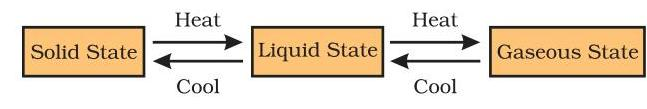

So, we infer that the state of matter can be changed into another state by changing the temperature.

We have learnt that substances around us change state from solid to liquid and from liquid to gas on application of heat. But there

[^0]
[^0]:    *Note: Kelvin is the SI unit of temperature, $0^{\circ} \mathrm{C}=273.15 \mathrm{~K}$. For convenience, we take $0^{\circ} \mathrm{C}=273 \mathrm{~K}$ after rounding off the decimal. To change a temperature on the Kelvin scale to the Celsius scale you have to subtract 273 from the given temperature, and to convert a temperature on the Celsius scale to the Kelvin scale you have to add 273 to the given temperature.

are some that change directly from solid state to gaseous state and vice versa without changing into the liquid state.

## Activity

Take some camphor. Crush it and put it in a china dish.
Put an inverted funnel over the china dish.
Put a cotton plug on the stem of the funnel, as shown in Fig. 1.7.
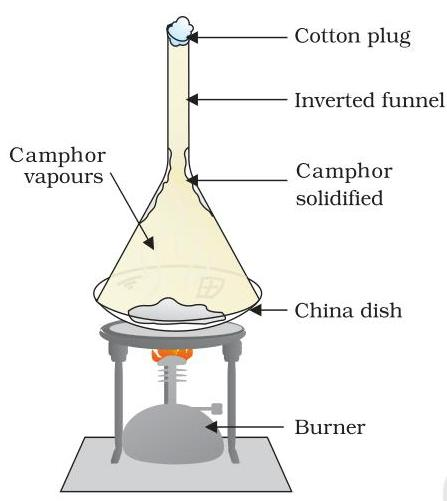

Fig. 1.7: Sublimation of camphor

* Now, heat slowly and observe.
* What do you infer from the above activity?

A change of state directly from solid to gas without changing into liquid state is called sublimation and the direct change of gas to solid without changing into liquid is called deposition.

### 1.4.2 EFFECT OF CHANGE OF PRESSURE

We have already learnt that the difference in various states of matter is due to the difference in the distances between the constituent particles. What will happen when we start putting pressure and compress a gas
enclosed in a cylinder? Will the particles come closer? Do you think that increasing or decreasing the pressure can change the state of matter?
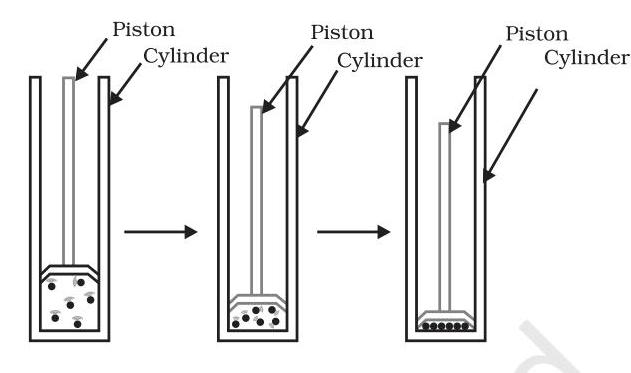

Fig. 1.8: By applying pressure, particles of matter can be brought close together

Applying pressure and reducing temperature can liquefy gases.

Have you heard of solid carbon dioxide $\left(\mathrm{CO}_{2}\right)$ ? It is stored under high pressure. Solid $\mathrm{CO}_{2}$ gets converted directly into gaseous state on decrease of pressure to 1 atmosphere* without coming into liquid state. This is the reason that solid carbon dioxide is also known as dry ice.

Thus, we can say that pressure and temperature determine the state of a substance, whether it will be solid, liquid or gas.
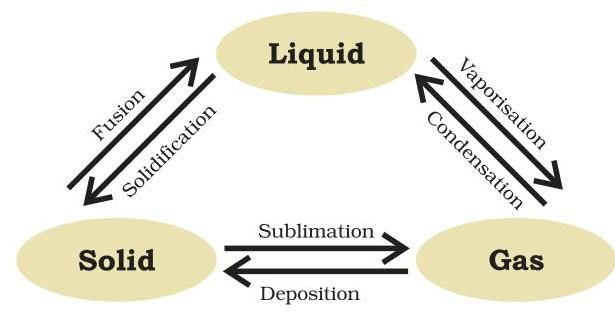

Fig. 1.9: Interconversion of the three states of matter

[^0]
[^0]:    * atmosphere (atm) is a unit of measuring pressure exerted by a gas. The unit of pressure is Pascal (Pa): 1 atmosphere $=1.01 \times 10^{5} \mathrm{~Pa}$. The pressure of air in atmosphere is called atmospheric pressure. The atmospheric pressure at sea level is 1 atmosphere, and is taken as the normal atmospheric pressure.

## Questions

1. Convert the following temperature to celsius scale:
a. $300 \mathrm{~K}$
b. 573 K
2. What is the physical state of water at:
a. $250^{\circ} \mathrm{C}$
b. $100^{\circ} \mathrm{C}$ ?
3. For any substance, why does the temperature remain constant during the change of state?
4. Suggest a method to liquefy atmospheric gases.

### 1.5 Evaporation

Do we always need to heat or change pressure for changing the state of matter? Can you quote some examples from everyday life where change of state from liquid to vapour takes place without the liquid reaching the boiling point? Water, when left uncovered, slowly changes into vapour. Wet clothes dry up. What happens to water in the above two examples?

We know that particles of matter are always moving and are never at rest. At a given temperature in any gas, liquid or solid, there are particles with different amounts of kinetic energy. In the case of liquids, a small fraction of particles at the surface, having higher kinetic energy, is able to break away from the forces of attraction of other particles and gets converted into vapour. This phenomenon of change of liquid into vapours at any temperature below its boiling point is called evaporation.

### 1.5.1 FACTORS AFFECTING

EVAPORATION
Let us understand this with an activity.

## Activity

- Take 5 mL of water in a test tube and keep it near a window or under a fan. - Take 5 mL of water in an open china dish and keep it near a window or under a fan.
- Take 5 mL of water in an open china
dish and keep it inside a cupboard or on a shelf in your class.
- Record the room temperature.
- Record the time or days taken for the evaporation process in the above cases.
- Repeat the above three steps of activity on a rainy day and record your observations.
- What do you infer about the effect of temperature, surface area and wind velocity (speed) on evaporation?

You must have observed that the rate of evaporation increases with-

- an increase of surface area:

We know that evaporation is a surface phenomenon. If the surface area is increased, the rate of evaporation increases. For example, while putting clothes for drying up we spread them out.

- an increase of temperature:

With the increase of temperature, more number of particles get enough kinetic energy to go into the vapour state.

- a decrease in humidity:

Humidity is the amount of water vapour present in air. The air around us cannot hold more than a definite amount of water vapour at a given temperature. If the amount of water in air is already high, the rate of evaporation decreases.

- an increase in wind speed:

It is a common observation that clothes dry faster on a windy day. With the increase in wind speed, the particles of water vapour move away with the wind, decreasing the amount of water vapour in the surrounding.

### 1.5.2 How DOES EVAPORATION CAUSE COOLING?

In an open vessel, the liquid keeps on evaporating. The particles of liquid absorb energy from the surrounding to regain the energy lost during evaporation. This absorption of energy from the surroundings make the surroundings cold.

What happens when you pour some acetone (nail polish remover) on your palm? The particles gain energy from your palm or surroundings and evaporate causing the palm to feel cool.

After a hot sunny day, people sprinkle water on the roof or open ground because the large latent heat of vaporisation of water helps to cool the hot surface.

Can you cite some more examples from daily life where we can feel the effect of cooling due to evaporation?
Why should we wear cotton clothes in summer?

During summer, we perspire more because of the mechanism of our body which keeps us cool. We know that during evaporation, the particles at the surface of the liquid gain energy from the surroundings or body surface and change into vapour. The heat energy equal to the latent heat of vaporisation is absorbed from the body leaving the body cool. Cotton, being a good absorber of water helps in absorbing the sweat and exposing it to the atmosphere for easy evaporation.

Why do we see water droplets on the outer surface of a glass containing ice-cold water?

Let us take some ice-cold water in a tumbler. Soon we will see water droplets on the outer surface of the tumbler. The water vapour present in air, on coming in contact with the cold glass of water, loses energy and gets converted to liquid state, which we see as water droplets.

## 0.111.111.111.111.111.111.111.111.111.111.111.111.111.111.111.111.111.111.111.111.111.111.111.111.111.111.111.111.111.111.111.111.111.111.111.111.111.111.111.111.111.111.111.111.111.111.111.111.111.111

- The arrangement of particles is most ordered in the case of solids, in the case of liquids layers of particles can slip and slide over each other while for gases, there is no order, particles just move about randomly.
- The states of matter are inter-convertible. The state of matter can be changed by changing temperature or pressure.
- Sublimation is the change of solid state directly to gaseous state without going through liquid state.
- Deposition is the change of gaseous state directly to solid state without going through liquid state.
- Boiling is a bulk phenomenon. Particles from the bulk (whole) of the liquid change into vapour state.
- Evaporation is a surface phenomenon. Particles from the surface gain enough energy to overcome the forces of attraction present in the liquid and change into the vapour state.
- The rate of evaporation depends upon the surface area exposed to the atmosphere, the temperature, the humidity and the wind speed.
- Evaporation causes cooling.
- Latent heat of vaporisation is the heat energy required to change 1 kg of a liquid to gas at atmospheric pressure at its boiling point.
- Latent heat of fusion is the amount of heat energy required to change 1 kg of solid into liquid at its melting point.
- Some measurable quantities and their units to remember:

| Quantity | Unit | Symbol |
| :-- | :-- | :-- |
| Temperature | kelvin | K |
| Length | metre | m |
| Mass | kilogram | kg |
| Weight | newton | N |
| Volume | cubic metre | $\mathrm{m}^{3}$ |
| Density | kilogram per cubic metre | $\mathrm{kg} \mathrm{m}^{-3}$ |
| Pressure | pascal | Pa |

# Exercises 

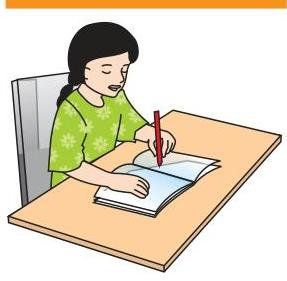

1. Convert the following temperatures to the celsius scale.
(a) 293 K
(b) 470 K
2. Convert the following temperatures to the kelvin scale.
(a) $25^{\circ} \mathrm{C}$
(b) $373^{\circ} \mathrm{C}$
3. Give reason for the following observations.
(a) Naphthalene balls disappear with time without leaving any solid.
(b) We can get the smell of perfume sitting several metres away.
4. Arrange the following substances in increasing order of forces of attraction between the particles - water, sugar, oxygen.
5. What is the physical state of water at-
(a) $25^{\circ} \mathrm{C}$
(b) $0^{\circ} \mathrm{C}$
(c) $100^{\circ} \mathrm{C}$ ?
6. Give two reasons to justify-
(a) water at room temperature is a liquid.
(b) an iron almirah is a solid at room temperature.
7. Why is ice at 273 K more effective in cooling than water at the same temperature?
8. What produces more severe burns, boiling water or steam?
9. Name A,B,C,D,E and F in the following diagram showing change in its state
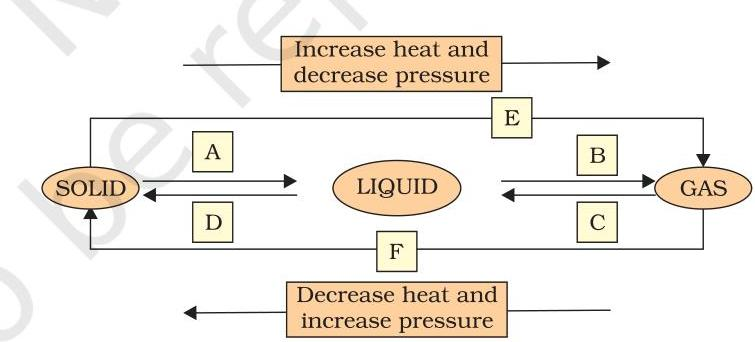

# Group Activity 

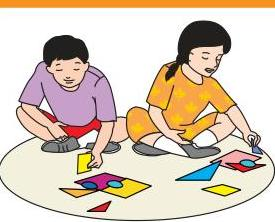

Prepare a model to demonstrate movement of particles in solids, liquids and gases.

## For making this model you will need

- A transparent jar
- A big rubber balloon or piece of stretchable rubber sheet
- A string
- Few chickpeas or black gram or dry green peas.

How to make?

- Put the seeds in the jar.
- $\quad$ Sew the string to the centre of the rubber sheet and put some tape to keep it tied securely.
- Stretch and tie the rubber sheet on the mouth of the jar.
- Your model is ready. Now run your fingers up and down the string by first tugging at it slowly and then rapidly.
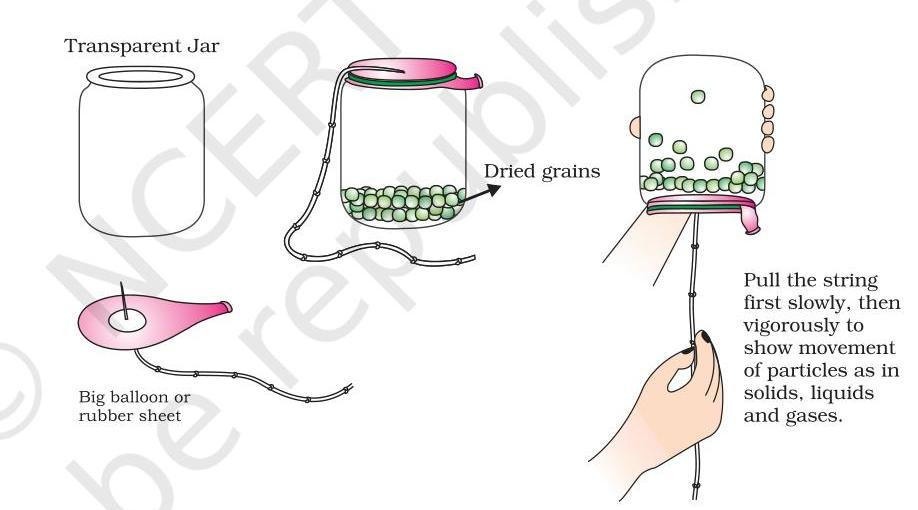

Fig. 1.10: A model for converting of solid to liquid and liquid to gas.

In [17]:
from mistralai.models import OCRResponse
from IPython.display import Markdown, display

def replace_images_in_markdown(markdown_str: str, images_dict: dict) -> str:
    for img_name, base64_str in images_dict.items():
        markdown_str = markdown_str.replace(f"![{img_name}]({img_name})", f"![{img_name}]({base64_str})")
    return markdown_str

def get_combined_markdown(ocr_response: OCRResponse) -> str:
  markdowns: list[str] = []
  for page in ocr_response.pages:
    image_data = {}
    for img in page.images:
      image_data[img.id] = img.image_base64
    markdowns.append(replace_images_in_markdown(page.markdown, image_data))

  return "\n\n".join(markdowns)

display(Markdown(get_combined_markdown(pdf_response)))

In [32]:
from mistralai.models import OCRResponse
from google.colab import files

def get_combined_markdown(ocr_response: OCRResponse) -> str:
  markdowns: list[str] = []
  for page_index, page in enumerate(ocr_response.pages):
    markdown_with_marker = f"<!-- PAGE_START_{page_index} -->\n{page.markdown}\n<!-- PAGE_END_{page_index} -->"
    markdowns.append(markdown_with_marker)

  return "\n".join(markdowns)

def download_images(ocr_response: OCRResponse):
  for page_index, page in enumerate(ocr_response.pages):
    image_data = {}
    for img in page.images:
      filename = f"page_{page_index}_image_{img.id}"
      header, encoded = img.image_base64.split(",", 1)
      # Save the image to a file
      with open(filename, 'wb') as f:
          f.write(base64.b64decode(encoded))
      # Download the file
      files.download(filename)

# Get the markdown content
markdown_content = get_combined_markdown(pdf_response)

# Write the content to a file
with open('ocr_output.txt', 'w') as f:
    f.write(markdown_content)

# Download the file
files.download('ocr_output.txt')
download_images(pdf_response)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

- And Image files...

In [7]:
image_file = Path("receipt.png")
assert image_file.is_file()

In [8]:
import base64

encoded = base64.b64encode(image_file.read_bytes()).decode()
base64_data_url = f"data:image/jpeg;base64,{encoded}"

image_response = client.ocr.process(document=ImageURLChunk(image_url=base64_data_url), model="mistral-ocr-latest")

response_dict = json.loads(image_response.json())
json_string = json.dumps(response_dict, indent=4)
print(json_string)

{
    "pages": [
        {
            "index": 0,
            "markdown": "# PLACE FACE UP ON DASH <br> CITY OF PALO ALTO <br> NOT VALID FOR ONSTREET PARKING \n\nExpiration Date/Time 11:59 PM\n\nAUG 19, 2024\n\nPurchase Date/Time: 01:34pm Aug 19, 2024\nTotal Due: $\\$ 15.00$\nRate: Daily Parking\nTotal Paid: $\\$ 15.00$\nPmt Type: CC (Swipe)\nTicket \\#: 00005883\nS/N \\#: 520117260957\nSetting: Permit Machines\nMach Name: Civic Center\n\\#^^^^-1224, Visa\nDISPLAY FACE UP ON DASH\n\nPERMIT EXPIRES\nAT MIDNIGHT",
            "images": [],
            "dimensions": {
                "dpi": 200,
                "height": 3210,
                "width": 1806
            }
        }
    ],
    "model": "mistral-ocr-2503-completion",
    "usage_info": {
        "pages_processed": 1,
        "doc_size_bytes": 3110191
    }
}


<ipython-input-8-c10acc1443c3>:8: PydanticDeprecatedSince20: The `json` method is deprecated; use `model_dump_json` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  response_dict = json.loads(image_response.json())


We want to be able to extract structured data from these files. For this, we will make use of `pixtral-12b-latest` and support it with our OCR model for better, high-quality answers.

In [9]:
image_ocr_markdown = image_response.pages[0].markdown

chat_response = client.chat.complete(
    model="pixtral-12b-latest",
    messages=[
        {
            "role": "user",
            "content": [
                ImageURLChunk(image_url=base64_data_url),
                TextChunk(text=f"This is image's OCR in markdown:\n<BEGIN_IMAGE_OCR>\n{image_ocr_markdown}\n<END_IMAGE_OCR>.\nConvert this into a sensible structured json response. The output should be strictly be json with no extra commentary")
            ],
        },
    ],
    response_format =  {"type": "json_object"},
    temperature=0
)

response_dict = json.loads(chat_response.choices[0].message.content)
json_string = json.dumps(response_dict, indent=4)
print(json_string)

{
    "parking_receipt": {
        "header": {
            "instructions": "PLACE FACE UP ON DASH",
            "city": "CITY OF PALO ALTO",
            "validity": "NOT VALID FOR ONSTREET PARKING"
        },
        "expiration": {
            "date_time": "11:59 PM",
            "date": "AUG 19, 2024"
        },
        "purchase": {
            "date_time": "01:34pm Aug 19, 2024"
        },
        "payment": {
            "total_due": "$15.00",
            "rate": "Daily Parking",
            "total_paid": "$15.00",
            "payment_type": "CC (Swipe)"
        },
        "details": {
            "ticket_number": "00005883",
            "serial_number": "520117260957",
            "setting": "Permit Machines",
            "machine_name": "Civic Center"
        },
        "footer": {
            "card_number": "#^^^^-1224",
            "card_type": "Visa",
            "instructions": "DISPLAY FACE UP ON DASH",
            "expiration_reminder": "PERMIT EXPIRES AT MIDNIGHT"
      

Note: We are leveraging a model already capable of vision tasks. However, we could also use text-only models for the structured output.

In [10]:
image_ocr_markdown = image_response.pages[0].markdown

chat_response = client.chat.complete(
    model="ministral-8b-latest",
    messages=[
        {
            "role": "user",
            "content": f"This is image's OCR in markdown:\n<BEGIN_IMAGE_OCR>\n{image_ocr_markdown}\n<END_IMAGE_OCR>.\nConvert this into a sensible structured json response. The output should be strictly be json with no extra commentary"
        },
    ],
    response_format =  {"type": "json_object"},
    temperature=0
)

response_dict = json.loads(chat_response.choices[0].message.content)
json_string = json.dumps(response_dict, indent=4)
print(json_string)

{
    "expiration_date_time": "11:59 PM",
    "expiration_date": "AUG 19, 2024",
    "purchase_date_time": "01:34pm Aug 19, 2024",
    "total_due": 15.0,
    "rate": "Daily Parking",
    "total_paid": 15.0,
    "payment_type": "CC (Swipe)",
    "ticket_number": "00005883",
    "serial_number": "520117260957",
    "setting": "Permit Machines",
    "machine_name": "Civic Center",
    "card_number": "1224",
    "card_type": "Visa"
}


### All Together
Let's design a simple function that takes an `image_path` file and returns a JSON structured output in a specific format. In this case, we arbitrarily decided we wanted an output respecting the following:

```python
class StructuredOCR:
    file_name: str  # can be any string
    topics: list[str]  # must be a list of strings
    languages: list[Language]  # a list of languages
    ocr_contents: dict  # any dictionary, can be freely defined by the model
```

We will make use of [custom structured outputs](https://docs.mistral.ai/capabilities/structured-output/custom_structured_output/) as well as `pycountry` for the languages.

In [ ]:
!pip install pycountry

In [ ]:
from enum import Enum
from pathlib import Path
from pydantic import BaseModel
import base64
import pycountry

languages = {lang.alpha_2: lang.name for lang in pycountry.languages if hasattr(lang, 'alpha_2')}

class LanguageMeta(Enum.__class__):
    def __new__(metacls, cls, bases, classdict):
        for code, name in languages.items():
            classdict[name.upper().replace(' ', '_')] = name
        return super().__new__(metacls, cls, bases, classdict)

class Language(Enum, metaclass=LanguageMeta):
    pass

class StructuredOCR(BaseModel):
    file_name: str
    topics: list[str]
    languages: list[Language]
    ocr_contents: dict

print(StructuredOCR.schema_json())

def structured_ocr(image_path: str) -> StructuredOCR:
    image_file = Path(image_path)
    assert image_file.is_file(), "The provided image path does not exist."

    # Read and encode the image file
    encoded_image = base64.b64encode(image_file.read_bytes()).decode()
    base64_data_url = f"data:image/jpeg;base64,{encoded_image}"

    # Process the image using OCR
    image_response = client.ocr.process(document=ImageURLChunk(image_url=base64_data_url), model="mistral-ocr-latest")
    image_ocr_markdown = image_response.pages[0].markdown

    # Parse the OCR result into a structured JSON response
    chat_response = client.chat.parse(
        model="pixtral-12b-latest",
        messages=[
            {
                "role": "user",
                "content": [
                    ImageURLChunk(image_url=base64_data_url),
                    TextChunk(text=(
                        "This is the image's OCR in markdown:\n"
                        f"<BEGIN_IMAGE_OCR>\n{image_ocr_markdown}\n<END_IMAGE_OCR>.\n"
                        "Convert this into a structured JSON response with the OCR contents in a sensible dictionnary."
                    ))
                ],
            },
        ],
        response_format=StructuredOCR,
        temperature=0
    )

    return chat_response.choices[0].message.parsed

We can now extract structured output from any image parsed with our OCR model.

In [ ]:
image_path = "receipt.png"
structured_response = structured_ocr(image_path)

response_dict = json.loads(structured_response.json())
json_string = json.dumps(response_dict, indent=4)
print(json_string)

The original image for comparison can be found below.

In [ ]:
from PIL import Image

image = Image.open(image_path)
image